In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# 1. Data Preprocessing
# Handle categorical variables with one-hot encoding
categorical_cols = data.select_dtypes(include='object').columns.drop('NObeyesdad')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(data[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_data, index=data.index, columns=encoded_cols)  # Keep index
data = data.drop(categorical_cols, axis=1)
data = pd.concat([data, encoded_df], axis=1)

# Encode target variable
label_encoder = LabelEncoder()
data['NObeyesdad'] = label_encoder.fit_transform(data['NObeyesdad'])

# Separate features and target variable
X = data.drop('NObeyesdad', axis=1)
y = data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load your dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# 1. Data Preprocessing
# Handle categorical variables with one-hot encoding
categorical_cols = data.select_dtypes(include='object').columns.drop('NObeyesdad')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(data[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_data, index=data.index, columns=encoded_cols)  # Keep index
data = data.drop(categorical_cols, axis=1)
data = pd.concat([data, encoded_df], axis=1)

# Encode target variable
label_encoder = LabelEncoder()
data['NObeyesdad'] = label_encoder.fit_transform(data['NObeyesdad'])

# Separate features and target variable
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Split data into training and testing


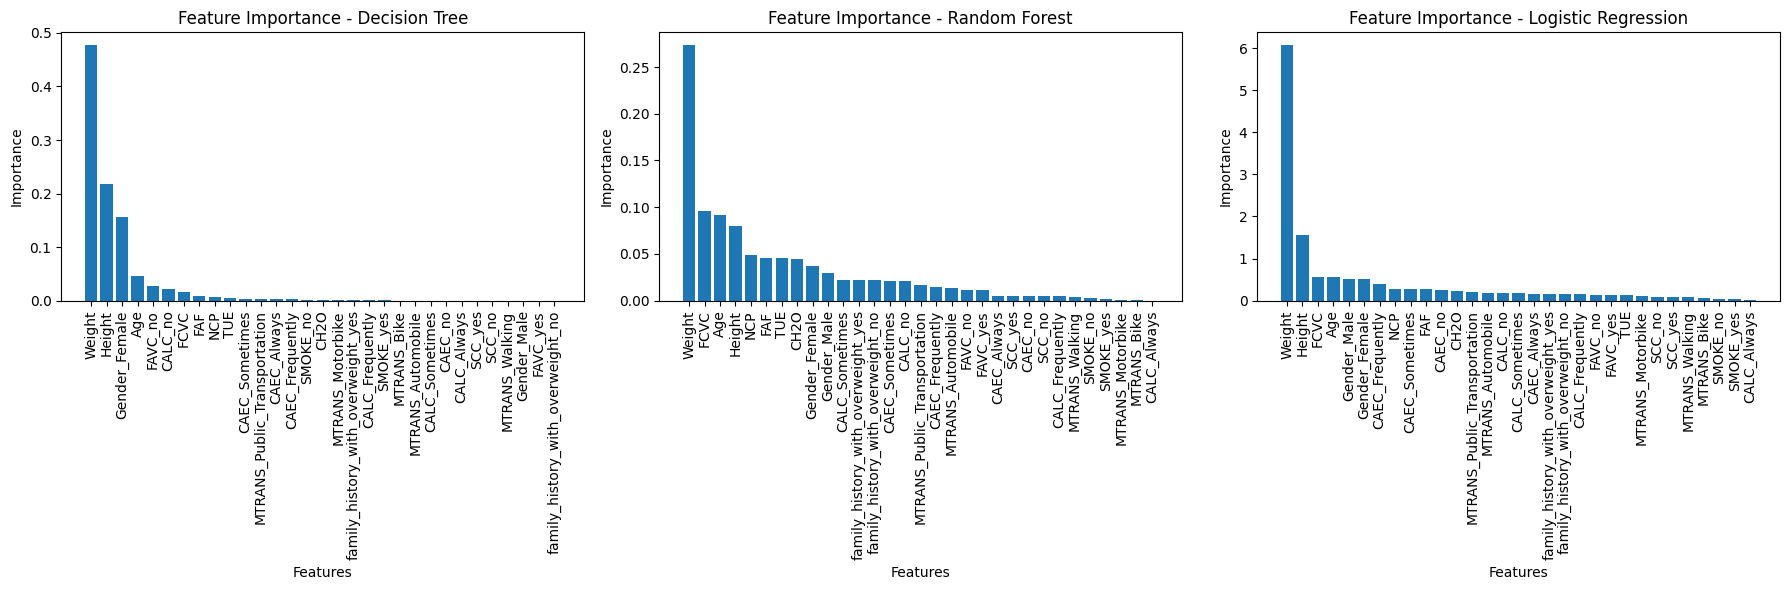

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load your dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# 1. Data Preprocessing
# Handle categorical variables with one-hot encoding
categorical_cols = data.select_dtypes(include='object').columns.drop('NObeyesdad')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(data[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_data, index=data.index, columns=encoded_cols)  # Keep index
data = data.drop(categorical_cols, axis=1)
data = pd.concat([data, encoded_df], axis=1)

# Encode target variable
label_encoder = LabelEncoder()
data['NObeyesdad'] = label_encoder.fit_transform(data['NObeyesdad'])

# Separate features and target variable
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features (important for Logistic Regression)
numerical_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# 2. Model Training and Feature Importance
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)  # Increased max_iter
}

feature_importances = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    else:  # Logistic Regression
        importances = np.abs(model.coef_).mean(axis=0)  # Mean absolute value across classes

    feature_importances[name] = importances

# 3. Visualization
plt.figure(figsize=(18, 6))  # Create a figure outside the loop

for i, (name, importances) in enumerate(feature_importances.items()):
    plt.subplot(1, len(models), i + 1)  # Create subplots within the figure
    feature_names = X.columns
    indices = np.argsort(importances)[::-1]

    # Bar plot
    plt.title(f"Feature Importance - {name}")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Importance")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Show the entire figure with all subplots


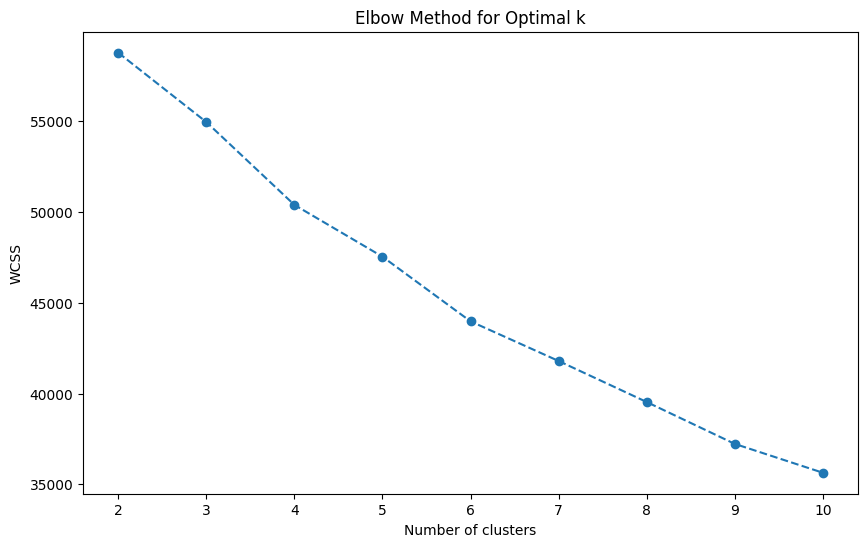

               Age    Height      Weight      FCVC       NCP      CH2O  \
Cluster                                                                  
0        28.312669  1.737161   91.206810  2.471433  2.727273  1.873628   
1        22.810523  1.722928  100.160138  2.465862  2.700711  2.111922   
2        31.960676  1.720253   86.997452  2.342853  2.740351  1.962479   
3        20.897142  1.640839   58.379596  2.381014  2.607799  1.844957   

              FAF       TUE  NObeyesdad  Gender_Female  ...   SCC_yes  \
Cluster                                                 ...             
0        1.075671  0.731358    2.704545       0.340909  ...  0.113636   
1        0.962642  0.712571    3.501828       0.458867  ...  0.000914   
2        1.014918  0.461942    3.244804       0.334873  ...  0.011547   
3        1.097813  0.698152    1.872222       0.705556  ...  0.157407   

         CALC_Always  CALC_Frequently  CALC_Sometimes   CALC_no  \
Cluster                                          

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# 1. Data Preprocessing
# Handle categorical variables with one-hot encoding
categorical_cols = data.select_dtypes(include='object').columns.drop('NObeyesdad')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(data[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_data, index=data.index, columns=encoded_cols)  # Keep index
data = data.drop(categorical_cols, axis=1)
data = pd.concat([data, encoded_df], axis=1)

# Encode target variable
label_encoder = LabelEncoder()
data['NObeyesdad'] = label_encoder.fit_transform(data['NObeyesdad'])

# Separate features and target variable
X = data.drop('NObeyesdad', axis=1)

# Scale numerical features
numerical_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


# 2. Determining the Optimal Number of Clusters (Elbow Method)
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10) # set n_init explicitly
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 3. K-Means Clustering
n_clusters = 4  # Choose the optimal number of clusters from the Elbow Method
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # set n_init explicitly
data['Cluster'] = kmeans.fit_predict(X)

# 4. Cluster Profiling
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

# 5. (Optional) Silhouette Score for validation
silhouette_avg = silhouette_score(X, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preparation
# Load the dataset
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Handle missing values (if any) -  Check for missing values first
print(data.isnull().sum()) #If there are any missing values handle them:
#data.dropna(inplace=True) # Remove rows with missing values
#data.fillna(data.mean(), inplace=True) # Fill missing numerical values with the mean

# Encode categorical features
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Scale numerical features - VERY IMPORTANT
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Prepare data for modeling
X = data.drop('NObeyesdad', axis=1)


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Compute BMI
df["BMI"] = df["Weight"] / (df["Height"] ** 2)

# Label encode categorical variables
label_encoders = {}
categorical_cols = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE",
                    "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future decoding

# Define features and target variable
X = df.drop(columns=["NObeyesdad"])  # Features
y = df["NObeyesdad"]  # Target

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train.iloc[:, :] = scaler.fit_transform(X_train)
X_test.iloc[:, :] = scaler.transform(X_test)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


/tmp/ipython-input-2076624571.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01311923 -1.01311923 -1.01311923 ... -1.01311923 -1.01311923
  0.98705066]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.iloc[:, :] = scaler.fit_transform(X_train)
/tmp/ipython-input-2076624571.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.46961161 0.46961161 0.46961161 ... 0.46961161 0.46961161 0.46961161]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.iloc[:, :] = scaler.fit_transform(X_train)
/tmp/ipython-input-2076624571.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.35508317 0.35508317 0.35508317 ... 0.35508317 0.35508317 0.35508317]' has dtype incompatible with i

Model Accuracy: 0.9929
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.97      1.00      0.98        62
           2       1.00      0.99      0.99        78
           3       0.98      1.00      0.99        58
           4       1.00      1.00      1.00        63
           5       1.00      0.98      0.99        56
           6       1.00      1.00      1.00        50

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423

Confusion Matrix:
 [[55  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  0 77  1  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  1  0  0  0 55  0]
 [ 0  0  0  0  0  0 50]]


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Compute BMI
df["BMI"] = df["Weight"] / (df["Height"] ** 2)

# Label encode categorical variables
label_encoders = {}
categorical_cols = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE",
                    "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future decoding

# Define features and target variable
X = df.drop(columns=["NObeyesdad"])  # Features
y = df["NObeyesdad"]  # Target

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy: 0.9929
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.97      1.00      0.98        62
           2       1.00      0.99      0.99        78
           3       0.98      1.00      0.99        58
           4       1.00      1.00      1.00        63
           5       1.00      0.98      0.99        56
           6       1.00      1.00      1.00        50

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423

Confusion Matrix:
 [[55  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  0 77  1  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  1  0  0  0 55  0]
 [ 0  0  0  0  0  0 50]]


Model Accuracy: 0.9929
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.97      1.00      0.98        62
           2       1.00      0.99      0.99        78
           3       0.98      1.00      0.99        58
           4       1.00      1.00      1.00        63
           5       1.00      0.98      0.99        56
           6       1.00      1.00      1.00        50

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423

Confusion Matrix:
 [[55  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  0 77  1  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  1  0  0  0 55  0]
 [ 0  0  0  0  0  0 50]]


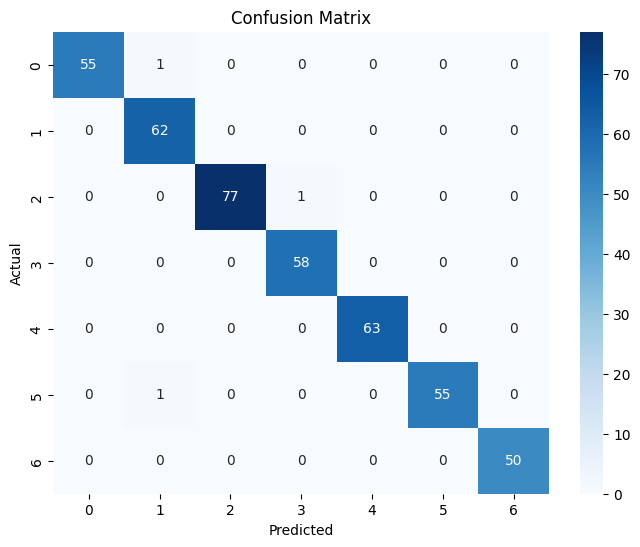

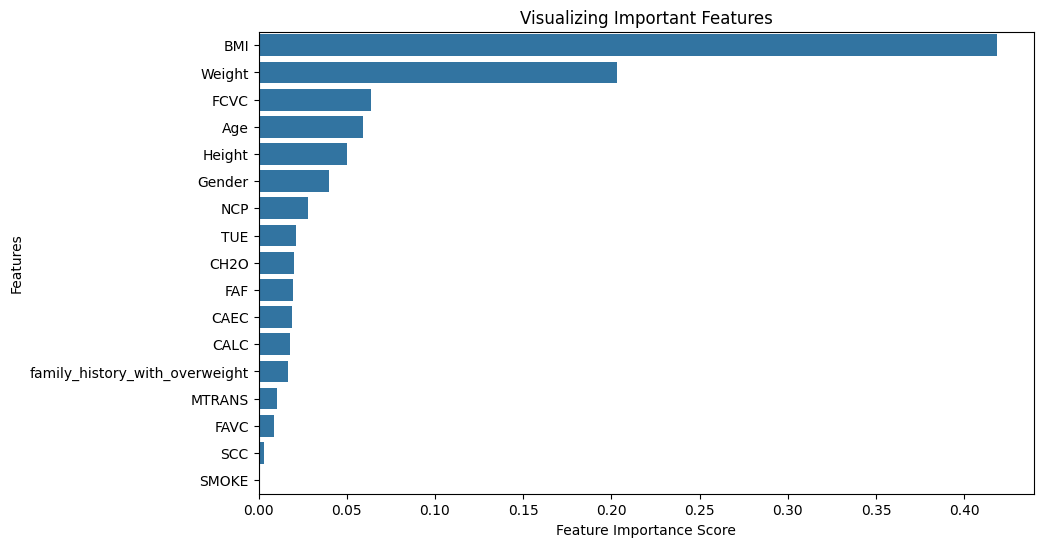

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Compute BMI
df["BMI"] = df["Weight"] / (df["Height"] ** 2)

# Label encode categorical variables
label_encoders = {}
categorical_cols = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE",
                    "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future decoding

# Define features and target variable
X = df.drop(columns=["NObeyesdad"])  # Features
y = df["NObeyesdad"]  # Target

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualization
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()